In [1]:
import sys 
sys.path.append('../..')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.functions import get_moving_avg
from scipy.stats import mstats

# Yearly

In [3]:
scale_table = pd.read_excel('../../output/to_send/005/scale_table.xlsx')

In [5]:
scale_table['Year'] = range(1814, 2020)

AREA prev,0.55,0.4602



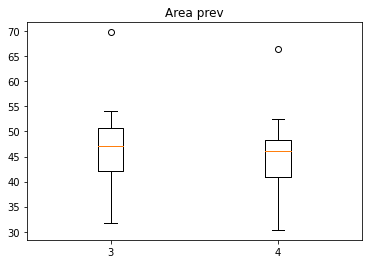

In [13]:
c1 = scale_table[scale_table['Class 4']==1]
c2 = scale_table[scale_table['Class 4']==2]
c3 = scale_table[scale_table['Class 4']==3]
c4 = scale_table[scale_table['Class 4']==4]


kruskalwallis = mstats.kruskalwallis(list(c3['Area'].dropna()), list(c4['Area'].dropna()))
print(f"AREA prev,{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}\n")
#print(f"{column},{weeks_to_month[column]},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}")
#plt.boxplot([c1[column].dropna(), c2[column].dropna(), c3[column].dropna(), c4[column].dropna()])
plt.boxplot([c3['Area'].dropna(), c4['Area'].dropna()], labels=['3', '4'])
plt.title("Area prev")
plt.show()

# Data preparation

In [3]:
min_temp = pd.read_excel('../../input/MinClimate_MODIFIED.xlsx', sheet_name='TEMP_MOD')
min_prec = pd.read_excel('../../input/MinClimate_MODIFIED.xlsx', sheet_name='PREC_MOD')
a_classified = pd.read_excel('../../input/quotient_deviation_df_A_CLASSIFIED.xlsx')
b_classified = pd.read_excel('../../input/quotient_deviation_df_B_CLASSIFIED_FIXED.xlsx')

In [4]:
min_temp = get_moving_avg(min_temp)

In [6]:
min_temp = min_temp[min_temp['Month']>4].reset_index(drop=True)
min_temp = min_temp[min_temp['Month']<10].reset_index(drop=True)
min_prec = min_prec[min_prec['Month']>4].reset_index(drop=True)
min_prec = min_prec[min_prec['Month']<10].reset_index(drop=True)

In [7]:
min_cumsum_prec = min_prec.cumsum()
min_cumsum_prec = get_moving_avg(min_cumsum_prec)
min_cumsum_prec['Month'] = min_prec['Month']
min_cumsum_prec['Week'] = min_prec['Week']
min_cumsum_prec['Day'] = min_prec['Day']

In [8]:
prec_max = max(min_cumsum_prec.max(skipna=True)[3:])
prec_min = min(min_cumsum_prec.min(skipna=True)[3:])

In [9]:
scaled_prec = (min_cumsum_prec - prec_min) / (prec_max - prec_min)
scaled_prec['Month'] = min_prec['Month']
scaled_prec['Week'] = min_prec['Week']
scaled_prec['Day'] = min_prec['Day']

In [10]:
temp_max = max(min_temp.max(skipna=True)[3:])
temp_min = min(min_temp.min(skipna=True)[3:])

In [12]:
scaled_temp = (min_temp - temp_min) / (temp_max - temp_min)
scaled_temp['Month'] = min_temp['Month']
scaled_temp['Week'] = min_temp['Week']
scaled_temp['Day'] = min_temp['Day']

In [23]:
scaled_moved_temp = scaled_temp[['Month', 'Week', 'Day']]
scaled_moved_prec = scaled_prec[['Month', 'Week', 'Day']]

for column in scaled_prec.columns:
    if not column in ['Month', 'Week', 'Day']:
        scaled_moved_temp[column+1] = scaled_temp[column]
        scaled_moved_prec[column+1] = scaled_prec[column]

C:\Users\8FEE~1\AppData\Local\Temp/ipykernel_13892/1066384259.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_moved_temp[column+1] = scaled_temp[column]
C:\Users\8FEE~1\AppData\Local\Temp/ipykernel_13892/1066384259.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_moved_prec[column+1] = scaled_prec[column]


In [30]:
area_df = abs(scaled_moved_temp - scaled_moved_prec)
area_df['Month'] = scaled_moved_temp['Month']
area_df['Week'] = scaled_moved_temp['Week']
area_df['Day'] = scaled_moved_temp['Day']

# Monthly

In [50]:
monthly_area = pd.DataFrame({
    'Year': area_df.columns[3:]
})

for month in set(area_df['Month']):
    area = area_df[area_df['Month']==month].sum(skipna=True)[3:]
    monthly_area[month] = list(area)

monthly_area['Class'] = list(a_classified[a_classified['Year']>1915]['Class 4']+1)+[np.nan]

In [64]:
monthly_area

,Year,5,6,7,8,9,Class
0,1916,10.801154,11.870140,13.559567,5.778459,3.500285,2.0
1,1917,7.219582,9.084387,8.205363,3.921252,3.602135,2.0
2,1918,9.611271,11.404139,9.581226,3.110037,3.857755,4.0
3,1919,8.248768,9.992424,5.878684,2.259541,5.404343,2.0
4,1920,7.365286,7.115985,7.895693,0.467934,7.422123,2.0
...,...,...,...,...,...,...,...
99,2015,4.860347,6.513452,4.896367,1.709608,8.623910,4.0
100,2016,9.496975,11.893152,10.119842,2.633322,7.425848,1.0
101,2017,7.460361,10.254773,7.370947,3.440001,8.615948,2.0
102,2018,8.268844,10.165761,2.165342,2.511055,0.000000,1.0


# Weekly

In [52]:
weekly_area = pd.DataFrame({
    'Year': area_df.columns[3:]
})

for week in set(area_df['Week']):
    area = area_df[area_df['Week']==week].sum(skipna=True)[3:]
    weekly_area[week] = list(area)

weekly_area['Class'] = list(a_classified[a_classified['Year']>1915]['Class 4']+1)+[np.nan]